In [41]:
import numpy as np
import matplotlib.pyplot as plt


In [42]:
from util import evaluate_polynomial_value, build_a

In [43]:
domain = (0,1)

In [44]:
tx = np.linspace(domain[0], domain[1], 12)
xarg = tx * 2 * np.pi
perfect = np.sin(xarg)
print('tx', tx)
print('perfect', perfect)


tx [0.         0.09090909 0.18181818 0.27272727 0.36363636 0.45454545
 0.54545455 0.63636364 0.72727273 0.81818182 0.90909091 1.        ]
perfect [ 0.00000000e+00  5.40640817e-01  9.09631995e-01  9.89821442e-01
  7.55749574e-01  2.81732557e-01 -2.81732557e-01 -7.55749574e-01
 -9.89821442e-01 -9.09631995e-01 -5.40640817e-01 -2.44929360e-16]


In [45]:
noise = np.random.normal(0, 0.1, tx.shape[0])
noisy = perfect + noise
print('noisy', noisy)

noisy [-0.04192129  0.51322515  0.97973561  1.11730881  0.64755578  0.36572148
 -0.19724445 -0.48970933 -0.87822292 -0.84486629 -0.44094962  0.11142756]


In [46]:
order = 12
A = build_a(order, tx)
print(A)

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [1.00000000e+00 9.09090909e-02 8.26446281e-03 7.51314801e-04
  6.83013455e-05 6.20921323e-06 5.64473930e-07 5.13158118e-08
  4.66507380e-09 4.24097618e-10 3.85543289e-11 3.50493899e-12
  3.18630818e-13]
 [1.00000000e+00 1.81818182e-01 3.30578512e-02 6.01051841e-03
  1.09282153e-03 1.98694823e-04 3.61263315e-05 6.56842391e-06
  1.19425889e-06 2.17137981e-07 3.94796328e-08 7.17811506e-09
  1.30511183e-09]
 [1.00000000e+00 2.72727273e-01 7.43801653e-02 2.02854996e-02
  5.53240899e-03 1.50883882e-03 4.11501495e-04 1.12227680e-04
  3.06075492e-05 8.34751342e-06 2.27659457e-06 6.20889428e-07
  1.69333480e-07]
 [1.00000000e+00 3.63636364e-01 1.32231405e-01 4.80841473e-02
  1.74851445e-02 6.35823435e-03 2.31208522e-03 8.40758261e-04
  3.05730277e-04 1.11174646e-04 4.04271440e-05 1.47007796e-0

In [47]:
(mw, residuals, rank, s) = np.linalg.lstsq(A, noisy, rcond=None)
print('model weights', mw)
print('model residuals', residuals)

model weights [-4.19212881e-02  2.05766444e+02 -5.95709061e+03  7.05958109e+04
 -4.43335456e+05  1.63380794e+06 -3.62102163e+06  4.50512973e+06
 -1.91470782e+06 -2.62687276e+06  4.45843064e+06 -2.64529464e+06
  5.89019669e+05]
model residuals []


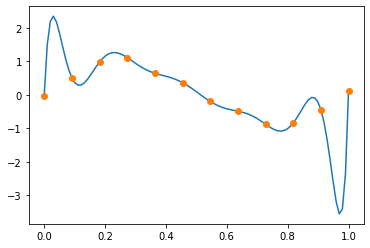

In [48]:
px = np.linspace(domain[0], domain[1], 100)
predicted = [ evaluate_polynomial_value(i, mw) for i in px]
plt.plot(px, predicted)
plt.plot(tx,noisy, marker='o', linestyle='None')
plt.show()